In [ ]:
pip install cvxopt

In [1]:
from cvxopt import matrix
from cvxopt import solvers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(a,b,c) = (1,1,1) # ax+by+c = 0
Npoints = 10000
offset_negative = 5+10*np.random.random((Npoints//2,1))
offset_positive = 5+10*np.random.random((Npoints//2,1))
x_negative = -20*np.random.random((Npoints//2,1)) # Negative class
x_positive = 20*np.random.random((Npoints//2,1))  # Positive class
y_negative = -(a/b)*x_negative-(c/b) - offset_negative
y_positive = -(a/b)*x_positive-(c/b) + offset_positive
labels_negative = -1*np.ones((Npoints//2,1))
labels_positive = np.ones((Npoints//2,1))

x_all = np.r_[x_negative,x_positive]
y_all = np.r_[y_negative,y_positive]
y_all_line = -(a/b)*x_all-(c/b)
labels_all = np.r_[labels_negative,labels_positive]

X = np.c_[x_all,y_all,np.ones((Npoints,1))]
print(f'X.shape: {X.shape}')

Diag = np.zeros((Npoints,Npoints))
np.fill_diagonal(Diag, labels_all)
print(f'Diag.shape: {Diag.shape}')

G_array = np.dot(Diag,X)
print(f'G.shape: {G_array.shape}')

X.shape: (10000, 3)
Diag.shape: (10000, 10000)
G.shape: (10000, 3)


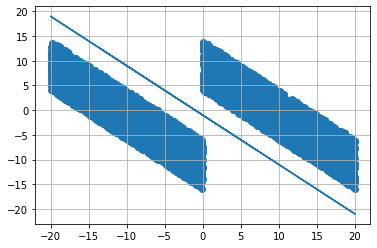

In [3]:
plt.plot(x_all,y_all_line)
plt.scatter(x_all,y_all)
plt.grid()
plt.show()

In [4]:
P_array = np.array([[1,0,0],[0,1,0],[0,0,0]])
P = matrix(P_array,tc='d')
G = matrix(G_array,tc='d')
q = matrix(np.array([0,0,0]),tc='d')
h = matrix(-1*np.ones((Npoints,1)), tc='d')

In [5]:
sol = solvers.qp(P,q,G,h)

     pcost       dcost       gap    pres   dres
 0:  7.2313e-03  1.5275e+03  2e+04  2e+00  1e+05
 1:  5.4132e-02 -1.9222e+03  2e+03  2e-01  1e+04
 2:  6.4590e-02 -3.4158e+01  3e+01  2e-03  2e+02
 3:  6.4461e-02 -3.5992e-01  4e-01  3e-05  2e+00
 4:  4.9962e-02  1.5122e-02  3e-02  4e-07  3e-02
 5:  4.9635e-02  1.7300e-02  3e-02  3e-07  3e-02
 6:  4.1731e-02  2.8898e-02  1e-02  1e-07  9e-03
 7:  3.9934e-02  3.5488e-02  4e-03  2e-08  2e-03
 8:  4.0017e-02  3.5597e-02  4e-03  2e-08  2e-03
 9:  4.0148e-02  3.6863e-02  3e-03  1e-08  9e-04
10:  3.9944e-02  3.8773e-02  1e-03  7e-10  7e-05
11:  3.9881e-02  3.9680e-02  2e-04  9e-11  8e-06
12:  3.9875e-02  3.9851e-02  2e-05  9e-12  8e-07
13:  3.9874e-02  3.9874e-02  3e-07  1e-13  9e-09
14:  3.9874e-02  3.9874e-02  3e-09  1e-15  9e-11
Optimal solution found.


In [6]:
len(sol['x'])

3

In [7]:
print(sol['x'][0],sol['x'][1],sol['x'][2])
print(np.square(sol['x'][0])+np.square(sol['x'][1]+np.square(sol['x'][2])))

-0.20014437798505913 -0.1992235455253532 -0.19982147117133378
0.06543264522849063


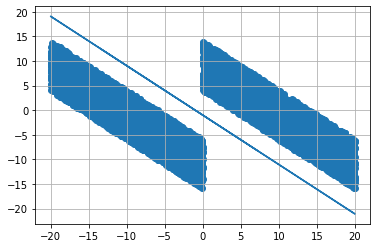

In [8]:
y_all_line_after = -(sol['x'][0]/sol['x'][1])*x_all-(sol['x'][2]/sol['x'][1])
plt.plot(x_all,y_all_line_after)
plt.scatter(x_all,y_all)
plt.grid()
plt.show()

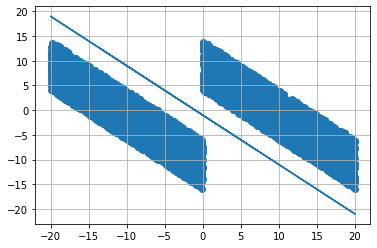

In [9]:
plt.plot(x_all,y_all_line)
plt.scatter(x_all,y_all)
plt.grid()
plt.show()

In [10]:
import tensorflow as tf

In [11]:
LogRegModel = tf.keras.Sequential()
LogRegModel.add(tf.keras.layers.Input(shape=(Npoints,)))
LogRegModel.add(tf.keras.layers.Dense(1, activation='sigmoid'))
LogRegModel.output_shape

(None, 1)

In [12]:
X_Train = np.c_[x_all,y_all]
y_Train = np.r_[labels_negative,labels_positive]
print(f'X_Train.shape: {X_Train.shape}')
print(f'y_Train.shape: {y_Train.shape}')

Npoints_test = 5000
offset_negative = 5+10*np.random.random((Npoints_test//2,1))
offset_positive = 5+10*np.random.random((Npoints_test//2,1))
x_negative_test = -20*np.random.random((Npoints_test//2,1)) # Negative class
x_positive_test = 20*np.random.random((Npoints_test//2,1))  # Positive class
y_negative_test = -(a/b)*x_negative_test-(c/b) - offset_negative
y_positive_test = -(a/b)*x_positive_test-(c/b) + offset_positive
labels_negative_test = -1*np.ones((Npoints_test//2,1))
labels_positive_test = np.ones((Npoints_test//2,1))

x_all_test = np.r_[x_negative_test,x_positive_test]
y_all_test = np.r_[y_negative_test,y_positive_test]
X_Test = np.c_[x_all_test,y_all_test]
y_Test = np.r_[labels_negative_test,labels_positive_test]
print(f'X_Test.shape: {X_Test.shape}')
print(f'y_Test.shape: {y_Test.shape}')



X_Train.shape: (10000, 2)
y_Train.shape: (10000, 1)
X_Test.shape: (5000, 2)
y_Test.shape: (5000, 1)


### WITH INPUT LAYER

In [13]:
model1 = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(2,)),
  tf.keras.layers.Dense(1,activation='sigmoid')])
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
optimizer='sgd',metrics=['accuracy'])
    
model1.fit(X_Train,y_Train)

313/313 [==============================] - 0s 1ms/step - loss: -45.9610 - accuracy: 0.5000


In [14]:
pred1 = model1.predict_classes(X_Test)
# print(pred1.shape)
print(np.max(pred1))
print(np.min(pred1[Npoints_test//2:,0]))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
1
1


In [15]:
model1.evaluate(X_Test,y_Test)

157/157 [==============================] - 0s 2ms/step - loss: -85.3300 - accuracy: 0.5000


[-85.32997131347656, 0.5]

### WIHTOUT INPUT LAYER

In [ ]:
model1.evaluate(X_Test,Y_)

In [ ]:
model2 = tf.keras.Sequential([  
  tf.keras.layers.Dense(1,input_shape=(2,),activation='sigmoid')])
model2.compile(optimizer='sgd', loss=tf.keras.losses.BinaryCrossentropy())
model2.fit(X_Train,y_Train)

In [ ]:
model2.predict(X_Test)

In [ ]:
model2.summary()

In [ ]:
wts1 = model1.get_weights()
wts2 = model2.get_weights()

In [ ]:
a_hat1 = wts1[0][0]
b_hat1 = wts1[0][1]
c_hat1 = wts1[1]

a_hat2 = wts2[0][0]
b_hat2 = wts2[0][1]
c_hat2 = wts2[1]

In [ ]:
y_all_line_NN1 = -(a_hat1/b_hat1)*x_all-(c_hat1/b_hat1)
plt.plot(x_all,y_all_line_NN1)
plt.scatter(x_all,y_all)
plt.grid()
plt.show()

In [ ]:
y_all_line_NN2 = -(a_hat2/b_hat2)*x_all-(c_hat2/b_hat2)
plt.plot(x_all,y_all_line_NN2)
plt.scatter(x_all,y_all)
plt.grid()
plt.show()

In [ ]:
print(a_hat1,b_hat1,c_hat1)
print(a_hat2,b_hat2,c_hat2)

In [ ]:
plt.plot(x_all,y_all_line_NN1,'-b')
plt.plot(x_all,y_all_line_after,'-k')
plt.legend(['LogReg','SVM'])
plt.grid()
plt.show()